# Parcial práctico 2

> Míneria de datos Python

> Daniela Alexandra Herrera Fandiño

> Octubre 2022

## Importar librerias

In [2]:

import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import style
import itertools
#import statsmodels.api as sm
#import pingouin as pg
from scipy import stats
from scipy.stats import pearsonr


pd.set_option('display.max_columns', None) #Mostrar todas las columnas

plt.style.use('ggplot')

## Importar datos

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
data = pd.read_excel('/content/drive/MyDrive/Mineria 2022-2/student-por.xlsx')
data



,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


 Dimension de los datos

In [6]:
print('Portugues')
print('Filas: ', data.shape[0])
print('Columnas: ', data.shape[1])

Portugues
Filas:  649
Columnas:  33


Atributos y tipo de atributo

In [7]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

Analizando datos faltantes

In [8]:
for col in data.columns:
    num_missing = data[col].isnull().sum()
    pct_missing = np.mean(data[col].isnull())
    #print(col," - ",round(pct_missing*100, 2),"% - ",num_missing)
    print('{} - {}% - {}'.format(col,round(pct_missing*100, 2),num_missing))

school - 0.0% - 0
sex - 0.31% - 2
age - 0.0% - 0
address - 0.0% - 0
famsize - 0.31% - 2
Pstatus - 0.31% - 2
Medu - 0.0% - 0
Fedu - 0.0% - 0
Mjob - 0.0% - 0
Fjob - 0.15% - 1
reason - 0.0% - 0
guardian - 0.31% - 2
traveltime - 0.0% - 0
studytime - 0.0% - 0
failures - 0.0% - 0
schoolsup - 0.0% - 0
famsup - 0.31% - 2
paid - 0.0% - 0
activities - 0.0% - 0
nursery - 0.15% - 1
higher - 0.15% - 1
internet - 0.0% - 0
romantic - 0.0% - 0
famrel - 0.0% - 0
freetime - 0.0% - 0
goout - 0.0% - 0
Dalc - 0.0% - 0
Walc - 0.0% - 0
health - 0.0% - 0
absences - 0.0% - 0
G1 - 0.0% - 0
G2 - 0.0% - 0
G3 - 0.0% - 0


Dentro del datset se reportan 2 valores faltantes para cada una de las siguientes variables: sex, famzise, psatus, guardian y famsup, los cuales estan representados en un 0.31%. Así mismo para fjob, nursery y higher se observa 1 valor faltante para cada variable equivalente a 0.15%

## Eliminar observaciones con faltantes


In [9]:
print('Antes de borrar registros: ',data.shape)
for col in data.columns:
    missing = data[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        data['{}_ismissing'.format(col)] = missing
ismissing_cols = [col for col in data.columns if 'ismissing' in col]
data['num_missing'] = data[ismissing_cols].sum(axis=1)

Antes de borrar registros:  (649, 33)
created missing indicator for: sex
created missing indicator for: famsize
created missing indicator for: Pstatus
created missing indicator for: Fjob
created missing indicator for: guardian
created missing indicator for: famsup
created missing indicator for: nursery
created missing indicator for: higher


In [10]:
columns_names = data.columns.values
columns = list(columns_names)

ind_missing = data[data['num_missing'] >= 1].index
df_less_missing_rows = data.drop(ind_missing, axis=0)
df_less_missing_rows = df_less_missing_rows[columns]
print('Antes de borrar registros: ',data.shape)
print('Después de borrar registros: ',df_less_missing_rows.shape)
print('Cantidad registros borrados: ',data.shape[0]-df_less_missing_rows.shape[0])

Antes de borrar registros:  (649, 42)
Después de borrar registros:  (636, 42)
Cantidad registros borrados:  13


Una vez depurada la base se concluye la omicion de 13 registros y se procede a comprobar nuevamente la informacion con los nuevos ajustes

In [11]:
df_less_missing_rows[df_less_missing_rows['sex'].isnull()].shape[0]
#df_less_missing_rows['Code'] = np.where(df_less_missing_rows['Code'].isnull(), df_less_missing_rows['Entity'],df_less_missing_rows['Code'])

0

In [12]:
data = df_less_missing_rows
data.shape

(636, 42)

De **649**  registros iniciales se tendran en cuenta **636** para el análisis

## Imputar datos perdidos

> Categóricos

In [13]:
df1 = data.copy()

In [14]:
df1[df1['sex'].isnull()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,sex_ismissing,famsize_ismissing,Pstatus_ismissing,Fjob_ismissing,guardian_ismissing,famsup_ismissing,nursery_ismissing,higher_ismissing,num_missing


In [16]:
df1['sex'] = data['sex'].fillna('_MISSING_')
df1.loc[395]


school                      GP
sex                          M
age                         18
address                      U
famsize                    GT3
Pstatus                      T
Medu                         4
Fedu                         4
Mjob                   teacher
Fjob                  services
reason                    home
guardian                father
traveltime                   1
studytime                    2
failures                     0
schoolsup                   no
famsup                     yes
paid                        no
activities                 yes
nursery                    yes
higher                     yes
internet                   yes
romantic                    no
famrel                       4
freetime                     3
goout                        3
Dalc                         2
Walc                         2
health                       2
absences                     0
G1                          12
G2                          12
G3      

In [17]:
data0 = data[data['sex'].isnull()]
data0

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,sex_ismissing,famsize_ismissing,Pstatus_ismissing,Fjob_ismissing,guardian_ismissing,famsup_ismissing,nursery_ismissing,higher_ismissing,num_missing


In [14]:
data1 = data[data['famsize'].isnull()]
data1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
191,GP,M,17,U,NaN,T,3,3,other,other,reputation,father,1,2,0,no,no,no,yes,no,yes,yes,no,4,3,4,1,4,4,4,11,9,10
278,GP,M,17,U,NaN,T,2,3,other,other,course,father,2,1,0,no,no,no,no,yes,yes,yes,no,5,2,2,1,1,2,2,9,12,13


## Coherencia


In [32]:
data[data.duplicated()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,sex_ismissing,famsize_ismissing,Pstatus_ismissing,Fjob_ismissing,guardian_ismissing,famsup_ismissing,nursery_ismissing,higher_ismissing,num_missing


In [33]:
data[data.duplicated()].size

0

No se observan registros que se encuentren duplicados.

## Análisis exploratorio



*   Tiempo de estudio
*   Calificación
*   Sexo



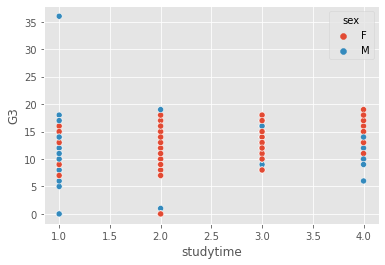

In [38]:
sns.scatterplot(data = data,  x="studytime", y="G3", hue = "sex") #añadiendo variable categorica

Incluyendo lugar de vivienda


*   Rural R
*   Urbano U



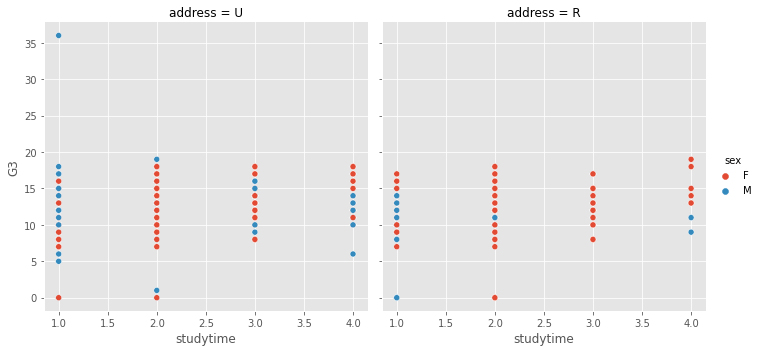

In [39]:
sns.relplot(
    data=data, x="studytime", y="G3",
    col="address", hue="sex",
    kind="scatter"
)


In [47]:
tab1 = pd.crosstab(data["reason"],data["Mjob"])#crosstab realiza todas las combinaciones entre dos variables cuali
tab1

Mjob,at_home,health,other,services,teacher
reason,,,,,
course,73,14,103,53,34
home,22,9,69,28,18
other,20,7,23,15,6
reputation,16,18,57,37,14


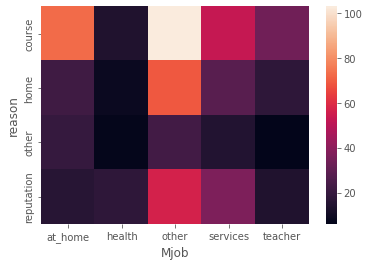

In [48]:
ax = sns.heatmap(tab1)

Relacion entre
* Tiempo de viaje a la institucion educativa
* Motivo por el cual eligio la institución

In [4]:
tab2 = pd.crosstab(data["reason"],data["traveltime"])#crosstab realiza todas las combinaciones entre dos variables cuali
tab2

traveltime,1,2,3,4
reason,,,,
course,144,99,31,11
home,100,42,4,3
other,36,24,10,2
reputation,86,48,9,0


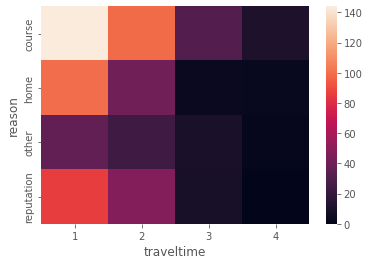

In [5]:
ax = sns.heatmap(tab2)

Relacion de
* Edad
* Calificación

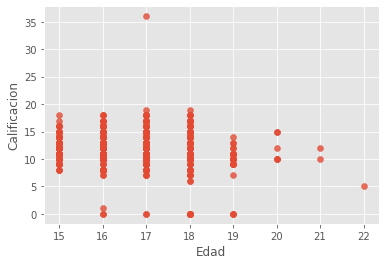

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=data.age, y=data.G3, alpha= 0.8)
ax.set_xlabel('Edad')
ax.set_ylabel('Calificacion');

¿El ***tiempo de viaje*** a la institucion tendrá relación con la cantidad de ***fallas*** de los estudiantes?

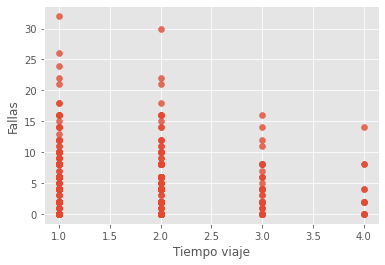

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=data.traveltime, y=data.absences, alpha= 0.8)
ax.set_xlabel('Tiempo viaje')
ax.set_ylabel('Fallas');

***Calificaciones*** de las ***instituciones*** agrupado por ***sexos*** 

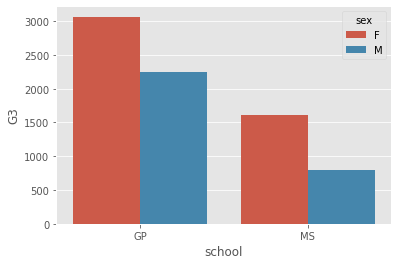

In [15]:
sns.barplot(data = data,
            estimator = sum,
            x = "school", 
            y = "G3",
            hue = "sex",
            ci = None)

*Para tener en cuenta: direccion, sexo, fallas, notas, colegio*

Las anteriores son variables candidatas para modelar debido a sus comportamientos respecto a los contrastes con demás variables. Una opcion viable para el estudio es incluir la variable *tiempo de estudio* para un análisis mas completo.

## Normalidad

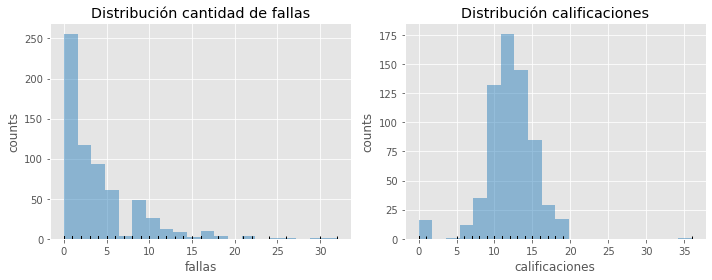

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].hist(x=data.absences, bins=20, color="#3182bd", alpha=0.5)
axs[0].plot(data.absences, np.full_like(data.absences, -0.01), '|k', markeredgewidth=1)
axs[0].set_title('Distribución cantidad de fallas')
axs[0].set_xlabel('fallas')
axs[0].set_ylabel('counts')

axs[1].hist(x=data.G3, bins=20, color="#3182bd", alpha=0.5)
axs[1].plot(data.G3, np.full_like(data.G3, -0.01), '|k', markeredgewidth=1)
axs[1].set_title('Distribución calificaciones')
axs[1].set_xlabel('calificaciones')
axs[1].set_ylabel('counts')


plt.tight_layout();


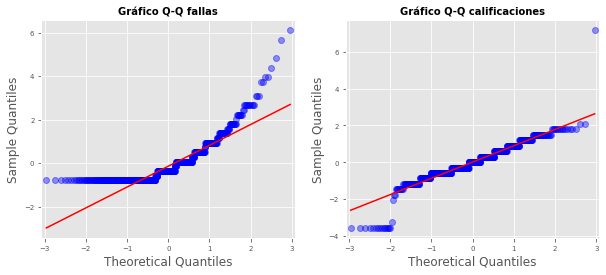

In [26]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sm.qqplot(
    data.absences,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = axs[0]
)
axs[0].set_title('Gráfico Q-Q fallas', fontsize = 10, fontweight = "bold")
axs[0].tick_params(labelsize = 7)

sm.qqplot(
    data.G3,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = axs[1]
)
axs[1].set_title('Gráfico Q-Q calificaciones', fontsize = 10, fontweight = "bold")
axs[1].tick_params(labelsize = 7)

In [27]:
shapiro_test = stats.shapiro(data.absences)
print(f"Variable fallas: {shapiro_test}")
shapiro_test = stats.shapiro(data.G3)
print(f"Variable weight: {shapiro_test}")

Variable fallas: ShapiroResult(statistic=0.7717442512512207, pvalue=4.5225174455118245e-29)
Variable weight: ShapiroResult(statistic=0.9076845049858093, pvalue=2.171676361281539e-19)


Bajo el análisis gráfico y los tests estadísticos, se comprueba que no es correcto asumir normalidad en estas variables. Sin embargo teniendo en cuenta la situacion, se empleará el coeficiente de Pearson a fines prácticos gracias a su robustez.

In [28]:
print('Correlación Pearson: ', data['absences'].corr(data['G3'], method='pearson'))


Correlación Pearson:  -0.033426019039435595


Evidencia de correlacion lineal negativa.

# Selección columnas para el análisis

In [31]:
columns = ['school',
           'sex',
           'address',
           'absences',
           'G3',
           'studytime']
df_data = data.copy()
df_data = df_data[columns]
df_data

,school,sex,address,absences,G3,studytime
0,GP,F,U,4,11,2
1,GP,F,U,2,11,2
2,GP,F,U,6,12,2
3,GP,F,U,0,14,3
4,GP,F,U,0,13,2
...,...,...,...,...,...,...
644,MS,F,R,4,10,3
645,MS,F,U,4,16,2
646,MS,F,U,6,9,2
647,MS,M,U,6,10,1


# Regresión lineal

In [41]:
df_data['studytime'].describe()

count    636.000000
mean       1.927673
std        0.829261
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

In [77]:
x=data[['G3']].values
y=data[['studytime']].values

In [54]:
# split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x , y, random_state=1)

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

linreg = LinearRegression(fit_intercept=True) # Con intercepto ya que no centralizamos los datos

linreg.fit(x, y)

LinearRegression()

In [58]:
# examine the coefficients
#print(linreg.coef_)

[[0.05670753]]


In [59]:
# make predictions
y_pred = linreg.predict(X_test)

In [60]:
# calculate RMSE
from sklearn import metrics
import numpy as np
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE:  0.8263723470562514


In [61]:
from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X_train)#le paso al modelo
X_test = StandardScaler().fit_transform(X_test)#le paso a las predicciones

## Ridge

In [62]:
# alpha=0 is equivalent to linear regression
from sklearn.linear_model import Ridge

ridgereg = Ridge(alpha=0)
ridgereg.fit(X_train, y_train)#estimo la funcion con el train
y_pred = ridgereg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.8522718973870658


In [63]:
# try alpha=0.1
ridgereg = Ridge(alpha=0.1)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.8522782259100045


In [70]:
# try alpha=0.001
ridgereg = Ridge(alpha=0.01)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.8522725303146139


In [64]:
# create an array of alpha values
alpha_range = 10.**np.arange(-2, 4)
alpha_range

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [65]:
# select the best alpha with RidgeCV
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline

ridgeregcv = RidgeCV(alphas=alpha_range, scoring= None)
ridgeregcv.fit(X_train, y_train)
ridgeregcv.alpha_
##la mejor combinacion de alpha fue con 100

100.0

In [66]:
# predict method uses the best alpha value
y_pred = ridgeregcv.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#el rmse es:

0.8578375378665207


Por lo anterior, 

In [163]:
# import module
from tabulate import tabulate
  
# assign data
mydata = [{"Regre lineal", "0.826"}, 
          {"alpha = 0", "0.852271"}, 
          {"alpha = 0.1", "0.8522782"}, 
          {"alpha = 0.01", "0.8522725"}]
  
# create header
head = [".", "RMSE"]
  
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

+--------------+----------+
| .            |     RMSE |
+==============+==========+
| Regre lineal | 0.826    |
+--------------+----------+
| alpha = 0    | 0.852271 |
+--------------+----------+
| alpha = 0.1  | 0.852278 |
+--------------+----------+
| alpha = 0.01 | 0.852272 |
+--------------+----------+


Hay discrepancia entre las diferentes variaciones ya que no se logra un ajuste adecuado

* Teniendo en cuenta modelo de regresion logistíca

In [158]:
# standardize X_train and X_test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = X_train.astype(float)
X_test = X_test.astype(float)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [160]:
# build a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9,solver='liblinear',multi_class='auto')
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, solver='liblinear')

## Particionando en *training* y *validacion*

>> k = 5

In [98]:
X=data[['G3','studytime']].values
Y = data['school'].values

In [99]:
# Separando en el 80% de entrenamiento y 20% de validacion
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) #test_size= el 20% de los datos uselos para testear, random_state= es una semilla

(508, 2) (128, 2) (508,) (128,)


In [102]:
# Crear el metodo K fold CV
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=666, shuffle=True) # shuffle que no sea el mismo orden cuando llegan los datos
Logisticuwu = LogisticRegression(solver='liblinear',C=1e9)

In [103]:
from sklearn.model_selection import cross_validate
scores = cross_validate(Logisticuwu, X_train, y_train,scoring= None,cv=cv, return_estimator=True) 
scores
for model in scores['estimator']:
    print(model.intercept_,model.coef_)

[2.36258069] [[-0.18305608 -0.43127684]]
[2.38849529] [[-0.21438021 -0.29561783]]
[2.06212947] [[-0.18521308 -0.23717212]]
[2.15732247] [[-0.19228199 -0.30790677]]
[1.91553224] [[-0.17510977 -0.30932187]]


In [104]:
scores['test_score']

array([0.74509804, 0.65686275, 0.7254902 , 0.71287129, 0.63366337])

In [109]:
intercepto=[];beta_0=[];beta_1=[];beta_2=[]
for j in range(0,5,1):
  intercepto.append (scores['estimator'][j].intercept_[0])
  beta_0.append (scores['estimator'][j].coef_[0][0])
  beta_1.append (scores['estimator'][j].coef_[0][1])
  beta_2.append (scores['estimator'][j].coef_[0][1])
print(np.mean(intercepto),np.mean(beta_0),np.mean(beta_1),np.mean(beta_2))

2.1772120287500867 -0.19000822578132381 -0.3162590856022652 -0.3162590856022652


In [145]:
y_pred=[]
for i in range(0,334,1):
  ods = np.exp(np.mean(intercepto)+np.mean(beta_0)*X_test[0][0]+np.mean(beta_1)*X_test[0][1]+np.mean(beta_2)*X_test[0][1])
  proba = ods/(1-ods)
  if proba<=0.5:
    y_pred.append(0)
  else:
    y_pred.append(1)

In [ ]:
from sklearn import metrics
print(' Agrupamiento Precision :', metrics.accuracy_score(y_test, y_pred))

In [162]:
y_pred_prob = logreg.predict_proba(X_test_scaled)
print(metrics.log_loss(y_test, y_pred_prob))

1.4444104431351956


Para un valor de
>> K = 10

In [148]:
# Crear el metodo K fold CV
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, random_state=666, shuffle=True)
Logisticuwu = LogisticRegression(solver='liblinear',C=1e9)

In [149]:
from sklearn.model_selection import cross_validate
scores = cross_validate(Logisticuwu, X_train, y_train,scoring='accuracy',cv=cv, return_estimator=True) 
scores
for model in scores['estimator']:
    print(model.intercept_,model.coef_)

[2.32189551] [[-0.19524222 -0.33130352]]
[2.20146579] [[-0.17934533 -0.39962569]]
[2.222326] [[-0.21560924 -0.19625606]]
[2.31738105] [[-0.18581105 -0.41743644]]
[2.13878724] [[-0.19051391 -0.27543452]]
[2.10386477] [[-0.18497358 -0.28105987]]
[2.12622122] [[-0.19126134 -0.28127031]]
[2.19725665] [[-0.1894764 -0.3431091]]
[2.12002251] [[-0.19166706 -0.29890019]]
[2.01271725] [[-0.17635344 -0.32544662]]


In [150]:
scores['test_score']

array([0.74509804, 0.7254902 , 0.58823529, 0.60784314, 0.68627451,
       0.76470588, 0.74509804, 0.70588235, 0.64      , 0.62      ])

In [152]:
intercepto=[];beta_0=[];beta_1=[];beta_2=[]
for j in range(0,10,1):
  intercepto.append (scores['estimator'][j].intercept_[0])
  beta_0.append (scores['estimator'][j].coef_[0][0])
  beta_1.append (scores['estimator'][j].coef_[0][1])
  beta_2.append (scores['estimator'][j].coef_[0][1])
print(np.mean(intercepto),np.mean(beta_0),np.mean(beta_1),np.mean(beta_2))

2.1761937981535278 -0.19002535798479428 -0.314984232964592 -0.314984232964592


In [155]:
y_pred=[]
for i in range(0,334,1):
  ods = np.exp(np.mean(intercepto)+np.mean(beta_0)*X_test[0][0]+np.mean(beta_1)*X_test[0][1]+np.mean(beta_2)*X_test[0][1])
  proba = ods/(1-ods)
  if proba<=0.5:
    y_pred.append(0)
  else:
    y_pred.append(1)

In [161]:

y_pred_prob = logreg.predict_proba(X_test_scaled)
print(metrics.log_loss(y_test, y_pred_prob))

1.4444104431351956


Se estima que para una adecuada precision en la Y de testeo, es acorde emplear un parametro k = 10 dados sus mejores resultados.